## Data Aggregation


---


In [ ]:
from bs4 import BeautifulSoup
from google.colab import files, drive
import pandas as pd
import numpy as np
import requests 

drive.mount('/content/drive')
drive_path = "drive/MyDrive/GroupGeneraterDataset/"

Mounted at /content/drive


In [ ]:
# grabbing dataset form this amazing website!
source = 'https://projectideas.co.in/computer-and-it-engineering-projects/'
dom_tree = requests.get(source, headers={"User-Agent": "XY"})

In [ ]:
dom_tree.text

'<!DOCTYPE html>\n<html lang="en-US" xmlns:fb="http://ogp.me/ns/fb#">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="profile" href="https://gmpg.org/xfn/11">\n<meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\n<title>Computer and IT Engineering Projects -</title>\n<link rel="canonical" href="https://projectideas.co.in/computer-and-it-engineering-projects/" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Computer and IT Engineering Projects -" />\n<meta property="og:description" content="Computer engineering or CSE is a field of engineering that is concerned with computer software development and research. We provide the widest list of computer engineering projects for engineering students. ProjectIdeas has the widest variety of projects for computer science students. This

In [ ]:
# https://projectideas.co.in/android-based-complaint-management-system/
test = requests.get('https://projectideas.co.in/android-based-complaint-management-system/', headers={"User-Agent": "XY"})
ts = BeautifulSoup(test.text, 'html.parser')
ts.find(role = 'navigation').find_all('span')[1].get_text()

'Android Mobile development'

In [ ]:
# extracting datas from the dom tree.
soup = BeautifulSoup(dom_tree.text, 'html.parser')
row_titles = soup.find_all(id="lcp_instance_0")
a_titles = []
for rt in row_titles:
  for a in rt.find_all('a'):
    a_titles.append(a)

In [ ]:
titles = []
links = []
for a in a_titles:
  titles.append(a.get_text())
  links.append(a.get('href'))
len(titles), len(links)

(711, 711)

In [ ]:
description = []
categories = []
for link in links:
  desc_dom_tree = requests.get(link, headers={"User-Agent": "XY"})
  desc_soup = BeautifulSoup(desc_dom_tree.text, 'html.parser')
  p_div = desc_soup.find(id='primary')

  if p_div is None:
    description.append('NaN')
    continue
  p = p_div.find('p')
  if p is None:
    description.append('NaN')
  else:
    description.append(p.get_text())
  
  category = desc_soup.find(role = 'navigation').find_all('span')[1].get_text()
  if category is None:
    categories.append('NaN')
  else:
    categories.append(category)


In [ ]:
df = pd.DataFrame({'title':titles, 'description':description, 'category':categories})
df.to_csv('ideas.csv')
files.download('ideas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data = files.upload()
df = pd.read_csv('ideas.csv')

Saving ideas.csv to ideas (1).csv


In [ ]:
df.category.unique()

array(['Android Mobile development', 'Data mining',
       'Artificial Intelligence & ML', 'Image Processing',
       'Web | Desktop Application', 'Security and Encryption',
       'Networking', 'Multimedia', 'Cloud Computing'], dtype=object)

# KeyBert Testing

In [ ]:
!pip install keybert
# !pip install keybert[flair]
# !pip install keybert[gensim]
# !pip install keybert[spacy]
# !pip install keybert[use]

In [ ]:
from google.colab import drive
from keybert import KeyBERT

Mounted at /content/drive


In [ ]:
df = pd.read_csv(drive_path + "ideas-2.csv")

In [ ]:
df.head()

,Unnamed: 0,title,description,category
0,0,Student Career And Personality Prediction Andr...,As students are going through their academics ...,Android Mobile development
1,1,Online Shopping Android Application,Online Shopping Android Application,Android Mobile development
2,2,Android Based Complaint Management System,Android Based Complaint Management System,Android Mobile development
3,3,Disease Prediction Android Application using M...,Disease prediction using patient treatment hi...,Android Mobile development
4,4,Android Password Based Remote Door Opener Syst...,Our project aims at remote password based door...,Android Mobile development


In [ ]:
df[500:].category.value_counts()

Web | Desktop Application     138
Image Processing               24
Security and Encryption        17
Android Mobile development     11
Networking                     10
Multimedia                      6
Data mining                     4
Cloud Computing                 1
Name: category, dtype: int64

In [ ]:
print(df.category.value_counts())

Web | Desktop Application       340
Android Mobile development      135
Image Processing                 87
Data mining                      80
Security and Encryption          31
Networking                       14
Artificial Intelligence & ML     13
Multimedia                       10
Cloud Computing                   1
Name: category, dtype: int64


In [ ]:
kw_model = KeyBERT()

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
# temp_df = df.copy()[:500]
temp_df = df.copy()
temp_df = temp_df.fillna("")
temp_df["keywords_from_desc"] = temp_df["description"].apply(lambda doc : dict(kw_model.extract_keywords(doc, top_n=5)))
temp_df["just_keywords"] = temp_df["keywords_from_desc"].apply(lambda doc : list(doc.keys()))
# temp_df["just_keywords"] = temp_df["keywords_from_desc"].apply(lambda doc : list(zip(*doc))[0])

In [ ]:
temp_df.head()

,title,description,category,keywords_from_desc,just_keywords
0,Student Career And Personality Prediction Andr...,As students are going through their academics ...,Android Mobile development,"{'recruiting': 0.435, 'recruiters': 0.4243, 'c...","['recruiting', 'recruiters', 'career', 'predic..."
1,Online Shopping Android Application,Online Shopping Android Application,Android Mobile development,"{'android': 0.5558, 'shopping': 0.5319, 'appli...","['android', 'shopping', 'application', 'online']"
2,Android Based Complaint Management System,Android Based Complaint Management System,Android Mobile development,"{'android': 0.5239, 'complaint': 0.496, 'manag...","['android', 'complaint', 'management', 'based']"
3,Disease Prediction Android Application using M...,Disease prediction using patient treatment hi...,Android Mobile development,"{'predicting': 0.3674, 'classification': 0.365...","['predicting', 'classification', 'prediction',..."
4,Android Password Based Remote Door Opener Syst...,Our project aims at remote password based door...,Android Mobile development,"{'password': 0.3944, 'android': 0.3427, 'door'...","['password', 'android', 'door', 'opener', 'blu..."


In [ ]:
# save to google drive
# temp_df.to_csv('ideas-keywords.csv')
temp_df.to_csv('all_ideas-keywords.csv', index=False)
!cp all_ideas-keywords.csv "drive/MyDrive/GroupGeneraterDataset/"

In [ ]:
# temp_df = pd.read_csv(drive_path + "ideas-keywords.csv")
temp_df = pd.read_csv(drive_path + "all_ideas-keywords.csv")

In [ ]:
temp_df.category.value_counts()

Web | Desktop Application       223
Android Mobile development       85
Data mining                      45
Image Processing                 40
Security and Encryption          19
Artificial Intelligence & ML     13
Networking                        9
Multimedia                        8
Cloud Computing                   1
Name: category, dtype: int64

In [ ]:
temp_clusters = {}
for i in range(len(temp_df)):
  temp_clusters[i] = {}

titles = list(temp_df["title"])
keywords = list(temp_df["just_keywords"])

In [ ]:
for i in range(len(temp_df)):
  max_overlap = 0
  overlap_index = i
  for j in range(len(temp_df)):
    if i != j:
      intersection = set(keywords[i]).intersection(set(keywords[j]))
      overlap_amount = len(intersection)

      # if "android" in intersection:
      #   overlap_amount -= 1
        
      if overlap_amount > max_overlap:
        max_overlap = overlap_amount
        overlap_index = j

  if max_overlap != 0:
    temp_clusters[overlap_index][titles[i]] = max_overlap


In [ ]:
for key, value in temp_clusters.items():
  print(titles[key])
  print(dict(sorted(value.items(), key = lambda x: x[1], reverse=True)))
  print("\n")



In [ ]:
clusters = []
for key, value in temp_clusters.items():
  clusters.append([titles[key]] + list(value.keys()))

clusters

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
model_path = drive_path + "GoogleNews-vectors-negative300.bin.gz"
model = KeyedVectors.load_word2vec_format(model_path, binary=True, unicode_errors='replace')

In [ ]:
keywords_0 = list(temp_df[temp_df["title"] == 'Predicting Heart Attacks']["just_keywords"])[0]
keywords_1 = list(temp_df[temp_df["title"] == 'Prediction and Classification of Cardiac Arrhythmia']["just_keywords"])[0]

In [ ]:
model.wv[keywords[0]].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(5, 300)

In [ ]:
from scipy import spatial

In [ ]:
for i in keywords_0:
  for j in keywords_1:
    print((i, j))
    print(1 - spatial.distance.cosine(model.wv[i].reshape(-1, 1), model.wv[j].reshape(-1, 1)))

# Clustering Attempts

---



### Non-ML Based

In [ ]:
# load key word data from drive

# full datas
temp_df = pd.read_csv(drive_path + "all_ideas-keywords.csv", index_col=False)
# 500 sampling datass 
# temp_df.to_csv('ideas-keywords.csv')

In [ ]:
temp_df.head()

,title,description,category,keywords_from_desc,just_keywords
0,Student Career And Personality Prediction Andr...,As students are going through their academics ...,Android Mobile development,"{'recruiting': 0.435, 'recruiters': 0.4243, 'c...","['recruiting', 'recruiters', 'career', 'predic..."
1,Online Shopping Android Application,Online Shopping Android Application,Android Mobile development,"{'android': 0.5558, 'shopping': 0.5319, 'appli...","['android', 'shopping', 'application', 'online']"
2,Android Based Complaint Management System,Android Based Complaint Management System,Android Mobile development,"{'android': 0.5239, 'complaint': 0.496, 'manag...","['android', 'complaint', 'management', 'based']"
3,Disease Prediction Android Application using M...,Disease prediction using patient treatment hi...,Android Mobile development,"{'predicting': 0.3674, 'classification': 0.365...","['predicting', 'classification', 'prediction',..."
4,Android Password Based Remote Door Opener Syst...,Our project aims at remote password based door...,Android Mobile development,"{'password': 0.3944, 'android': 0.3427, 'door'...","['password', 'android', 'door', 'opener', 'blu..."


In [ ]:
# default value for non existing keyword.
default = list(np.zeros(300))

In [ ]:
# fine-tuning, get keyword embeddings
text_vector_data = list()
for keywords in temp_df['just_keywords']:
  text_v = list()
  for i in range(5):
    if i < len(keywords):
      if keywords[i] in model.wv.index2word:
        text_v.append(list(model.wv[keywords[i]]))
      else:
        text_v.append(default)
    else:
      text_v.append(default)
  text_vector_data.append(text_v)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Experiment1: Sum up each topic of keywords to reduce dimension.

---



In [ ]:
# preparing data
temp_df = pd.read_csv(drive_path + "all_ideas-keywords.csv", index_col=False)['just_keywords']
keywords = []
for kws in temp_df:
  kws = re.findall('[a-z]+', kws, flags=re.IGNORECASE)
  keywords.append(kws)

In [ ]:
keywords[0]

['recruiting', 'recruiters', 'career', 'prediction', 'candidate']

In [ ]:
# vetorize
vetorized_datas = []
for kws in keywords:
  text_v = []
  for kw in kws:
    try:
      text_v.append(list(model[kw]))
    except:
      continue
  if len(text_v) == 0:
    text_v = np.zeros((5,300))
  sum_v = np.sum(np.array(text_v),axis=0)
  sum_v = sum_v / np.sum(sum_v)
  vetorized_datas.append(sum_v.tolist())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [ ]:
df = pd.DataFrame(np.array(vetorized_datas))

In [ ]:
df = df.fillna(0)

In [ ]:
df.to_numpy().shape

(443, 300)

In [ ]:
# save to google drive
df.to_csv('all_ideas_vec.csv', index=False)
!cp all_ideas_vec.csv "drive/MyDrive/GroupGeneraterDataset/"

Expriment2: using cov1 layer to extend features

---



In [ ]:
labels = temp_df['category']
labels.shape

(443,)

In [ ]:
# 5 keywords, 300 dimentions for each
text_vector_data = np.array(text_vector_data)
text_vector_data.shape

(443, 5, 300)

In [ ]:
# make covolusion layers to extend features
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
convs = nn.ModuleList([nn.Sequential(nn.Conv1d(in_channels=300, 
                  out_channels=150, 
                  kernel_size=h),
            nn.ReLU())
            for h in [2,3,4]])
cov_input = torch.tensor(text_vector_data,dtype=torch.float).permute(0,2,1)

In [ ]:
out = [conv(cov_input) for conv in convs]
for i in range(len(out)):
  print(out[i].shape)
coved_data = torch.cat(out, dim=2)

torch.Size([443, 150, 4])
torch.Size([443, 150, 3])
torch.Size([443, 150, 2])


In [ ]:
coved_data.shape

torch.Size([443, 150, 9])

In [ ]:
coved_data = coved_data.permute(0,2,1)
coved_data.shape

torch.Size([443, 9, 150])

In [ ]:
coved_data_flatten = coved_data.reshape(-1, 9*150)
coved_data_flatten.shape

torch.Size([443, 1350])

In [ ]:
processed_data = coved_data_flatten.detach().numpy()
processed_data.shape

(443, 1350)

In [ ]:
from pandas.io.parsers.c_parser_wrapper import is_index_col
# save processed data for this step
#  full original word vectors
original_df = pd.DataFrame(text_vector_data.reshape(-1, 1500))
original_df.to_csv('all_original_wv.csv', index=False)
!cp all_original_wv.csv "drive/MyDrive/GroupGeneraterDataset/"
#  full word vectors after conv1d * 3
conv1d_df = pd.DataFrame(processed_data)
conv1d_df.to_csv('all_conv1d_wv.csv', index=False)
!cp all_conv1d_wv.csv "drive/MyDrive/GroupGeneraterDataset/"


### Unsupervised Clustering

K-means 

In [ ]:
def sort_dict(d):
  return dict(sorted(d.items(), key=lambda x : x[1], reverse=True))

In [ ]:
# groups we need
group_size = 5
K = coved_data_flatten.shape[0] // group_size

In [ ]:
processed_data.shape

(364, 1350)

In [ ]:
categories = set(temp_df["category"])
K = len(categories)

In [ ]:
enums = [i for i in range(K)]
mapping = dict(zip(categories, enums))
true_labels = [mapping[cat] for cat in list(temp_df["category"])]
true_labels

In [ ]:
def get_grouping_counts(cluster_labels):
  groupings = {i: [] for i in range(K)}

  for i in range(len(cluster_labels)):
    groupings[cluster_labels[i]].append(true_labels[i])

  for key, value in groupings.items():
    groupings[key] = sort_dict(collections.Counter(value))
  return groupings



In [ ]:
from sklearn.cluster import KMeans
import collections
kmeans = KMeans(n_clusters=K, random_state=0).fit(processed_data)
cluster_labels = list(kmeans.labels_)

groupings = get_grouping_counts(cluster_labels)
groupings

{0: {1: 19, 7: 16, 5: 8, 6: 5, 0: 3, 2: 1, 4: 1},
 1: {7: 15, 6: 6, 1: 4, 5: 3, 2: 2, 4: 1, 0: 1},
 2: {7: 39, 1: 29, 6: 14, 5: 7, 2: 5, 3: 2, 4: 1, 0: 1},
 3: {7: 21, 1: 6, 5: 2},
 4: {6: 9, 7: 9, 1: 7, 5: 3, 0: 2, 2: 1, 3: 1},
 5: {7: 35, 5: 16, 1: 6, 0: 3, 6: 2, 2: 1},
 6: {7: 6, 6: 4, 2: 2, 0: 2, 1: 1, 5: 1, 4: 1},
 7: {7: 20, 1: 13, 5: 5, 2: 1, 3: 1}}

In [ ]:
mapping

{'Security and Encryption': 0,
 'Android Mobile development': 1,
 'Artificial Intelligence & ML': 2,
 'Multimedia': 3,
 'Networking': 4,
 'Data mining': 5,
 'Image Processing': 6,
 'Web | Desktop Application': 7}

In [ ]:
sort_dict(collections.Counter(true_labels))

{7: 161, 1: 85, 5: 45, 6: 40, 2: 13, 0: 12, 4: 4, 3: 4}

In [ ]:
from sklearn.manifold import TSNE

dim_reduced_data = TSNE(n_components=2, learning_rate='auto',
                        init='random', perplexity=3).fit_transform(processed_data)
kmeans = KMeans(n_clusters=K, random_state=0).fit(dim_reduced_data)     
cluster_labels = list(kmeans.labels_)

groupings = get_grouping_counts(cluster_labels)
groupings

{0: {7: 29, 1: 22, 6: 9, 2: 3, 5: 3, 3: 2, 0: 1},
 1: {7: 12, 6: 6, 5: 4, 0: 4, 1: 3, 2: 2, 4: 1},
 2: {7: 24, 1: 7, 6: 2, 5: 1},
 3: {7: 15, 1: 10, 5: 5, 6: 4, 2: 2, 4: 1},
 4: {7: 15, 6: 7, 5: 4, 0: 3, 1: 2, 3: 1, 4: 1},
 5: {7: 37, 5: 17, 1: 9, 6: 4, 0: 3, 2: 2, 4: 1},
 6: {1: 19, 7: 15, 6: 7, 5: 5, 2: 3, 0: 1},
 7: {7: 14, 1: 13, 5: 6, 2: 1, 6: 1, 3: 1}}

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dim_reduced_data[:, 0], dim_reduced_data[:, 1])

NameError: ignored

In [ ]:
text_vector_data_reshaped = text_vector_data.reshape(364, 1500)
dim_reduced_data = TSNE(n_components=2, learning_rate='auto',
                        init='random', perplexity=3).fit_transform(text_vector_data_reshaped)
kmeans = KMeans(n_clusters=K, random_state=0).fit(dim_reduced_data)     
cluster_labels = list(kmeans.labels_)

groupings = get_grouping_counts(cluster_labels)
groupings

{0: {7: 23, 1: 18, 6: 10, 2: 3, 5: 2, 3: 2, 0: 1},
 1: {7: 28, 5: 12, 1: 6, 2: 1, 6: 1, 0: 1},
 2: {7: 9, 6: 4, 0: 3, 1: 2, 5: 2},
 3: {7: 25, 1: 18, 5: 11, 6: 8, 2: 3, 0: 2, 3: 2, 4: 1},
 4: {1: 15, 7: 12, 5: 2, 6: 2, 0: 2},
 5: {7: 26, 1: 7, 6: 6, 5: 4, 2: 2, 4: 1, 0: 1},
 6: {7: 19, 1: 14, 5: 8, 6: 4, 0: 2, 2: 1, 4: 1},
 7: {7: 19, 1: 5, 6: 5, 5: 4, 2: 3, 4: 1}}

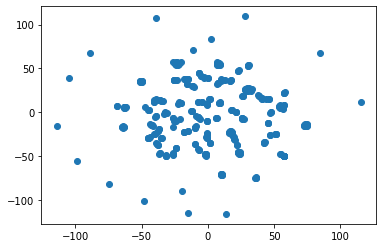

In [ ]:
plt.scatter(dim_reduced_data[:, 0], dim_reduced_data[:, 1])

In [ ]:
# loading data from drive
wv_data_original = pd.read_csv(drive_path + "all_original_wv.csv", index_col=False)
wv_data_conv1d = pd.read_csv(drive_path + "all_conv1d_wv.csv", index_col=False)
wv_labels = pd.read_csv(drive_path + "all_ideas-keywords.csv", index_col=False)['category']

# Data Visualization Testing

---



In [ ]:
from collections import Counter
import numpy as np
def stacked_bar(group_skills, skills, title):
  lists = {skills[i]:[] for i in range(len(skills))}
  for group in group_skills:
    counts = Counter(group)
    for key, value in lists.items():
      if key in counts.keys():
        lists[key].append(counts[key])
      else:
        lists[key].append(0)
    
  for key, value in lists.items():  
    lists[key] = np.array(lists[key])

  plt.figure(figsize=(10,10))
  previous = lists[skills[0]]
  plt.bar([str(i) for i in range(len(group_skills))], lists[skills[0]])

  for j in range(1, len(skills)):
    plt.bar([str(i) for i in range(len(group_skills))], lists[skills[j]], bottom=previous)
    previous += lists[skills[j]]
      
  plt.legend(list(lists.keys()))
  plt.title(title)


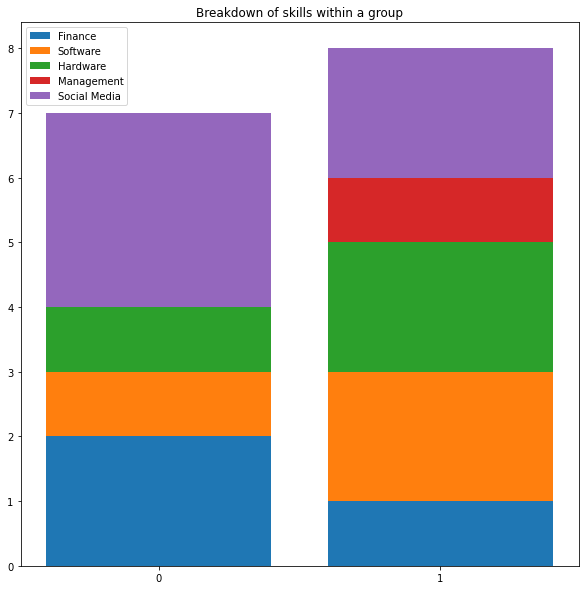

In [ ]:
group_1_skills = ["Finance", "Finance", "Software", "Social Media", "Social Media", "Social Media", "Hardware"]
group_2_skills = ["Finance", "Software", "Software", "Hardware", "Social Media", "Social Media", "Hardware", "Management"]

stacked_bar([group_1_skills, group_2_skills], ["Finance", "Software", "Hardware", "Management", "Social Media"], "Breakdown of skills within a group")

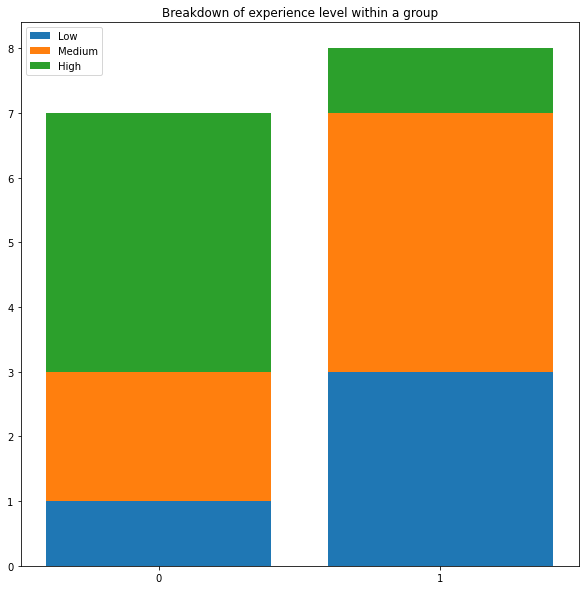

In [ ]:
group_1_exp = ["Low", "Medium", "Medium", "High", "High", "High", "High"]
group_2_exp = ["Low", "Low", "Low", "Medium", "Medium", "Medium", "Medium", "High"]

stacked_bar([group_1_exp, group_2_exp], ["Low", "Medium", "High"], "Breakdown of experience level within a group")

In [ ]:
def to_str(list):
  return " ".join(e for e in list)

In [ ]:
!pip install venn

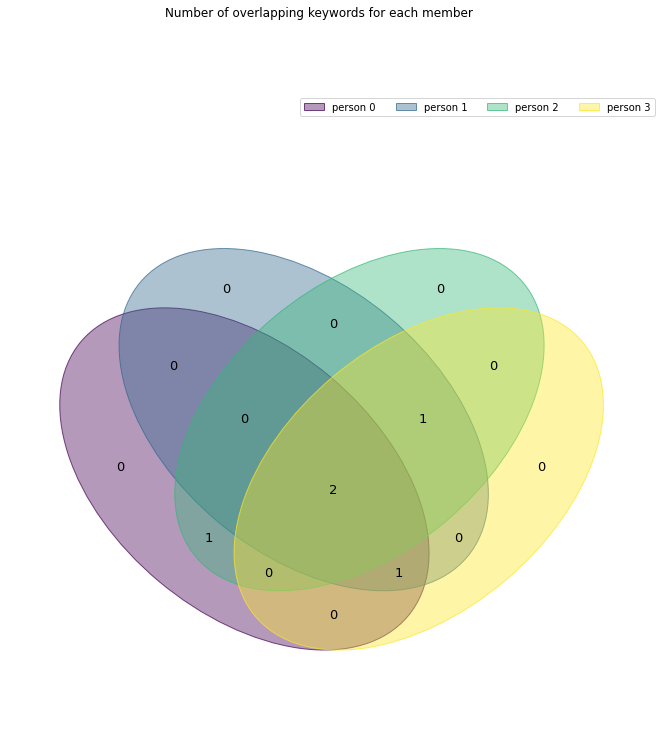

In [ ]:
from venn import venn
labels = ["person " + str(i) for i in range(5)]
d1 = ["test1", "test2", "test3", "test5"]
d2 = ["test3", "test4", "test5", "test2"]
d3 = ["test1", "test4", "test2", "test5"]
d4 = ["test3", "test4", "test3", "test5", "test2"]


sets = {
    labels[0]: set(d1),
    labels[1]: set(d2),
    labels[2]: set(d3),
    labels[3]: set(d4)
}
fig, ax = plt.subplots(1, figsize=(16,12))
fig.suptitle("Number of overlapping keywords for each member")
venn(sets, ax=ax)
plt.legend(labels, ncol=6)


In [ ]:
def get_relevancy_df(doc):
  results = kw_model.extract_keywords(test_doc, keyphrase_ngram_range=(1, 1), stop_words='english',
                                use_mmr=True, diversity=0.7)

  keywords, relevancy = zip(*results)
  temp_df = pd.DataFrame({"Keywords": keywords, "Relevancy": relevancy})
  cmGreen = sns.light_palette("green", as_cmap=True)
  cmRed = sns.light_palette("red", as_cmap=True)
  temp_df = temp_df.style.background_gradient(
      cmap=cmGreen,
      subset=[
          "Relevancy",
      ],
  )

  format_dictionary = {
      "Relevancy": "{:.1%}",
  }

  temp_df = temp_df.format(format_dictionary)

  return temp_df

In [ ]:
#!pip install keybert
from keybert import KeyBERT
import pandas as pd
import seaborn as sns

In [ ]:
kw_model = KeyBERT()

In [ ]:
test_doc = "As students are going through their academics and pursuing their interested courses, it is very important for them to assess their capabilities and identify their interests so that they will get to know in which career area their interests and capabilities are going to put them in. This will help them in improving their performance and motivating their interests so that they will be directed towards their targeted career and get settled in that. Also recruiters while recruiting the candidates after assessing them in all different aspects, these kind of career recommender systems help them in deciding in which job role the candidate should be kept in based on his/her performance and other evaluations. This paper mainly concentrates on the career area prediction of computer science domain candidates."
temp_df = get_relevancy_df(test_doc)
temp_df

,Keywords,Relevancy
0,recruiting,43.5%
1,recommender,31.6%
2,performance,22.1%
3,domain,20.9%
4,aspects,20.9%


# IPywidgets Pseudo Interactive UI

---



In [ ]:
!pip install venn
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter
from venn import venn
import matplotlib.pyplot as plt
import seaborn as sns

import re 

from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output
import ipywidgets as widgets

# connected to google dirve
from google.colab import files, drive
drive.mount('/content/drive')
drive_path = "drive/MyDrive/GroupGeneraterDataset/"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
!pip install keybert
from keybert import KeyBERT
# initialize key word model
kw_model = KeyBERT()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.0 MB/s 
     |████████████████████████████████| 237 kB 20.1 MB/s 
     |████████████████████████████████| 51 kB 2.6 MB/s 
     |████████████████████████████████| 5.8 MB 64.0 MB/s 
     |████████████████████████████████| 1.3 MB 45.9 MB/s 
     |████████████████████████████████| 182 kB 49.9 MB/s 
     |████████████████████████████████| 7.6 MB 45.5 MB/s 
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23800 sha256=1570820b65eb31be194b1c24e4030adcac2b665b9c0ff05ddd5300d8e1602bd4
  Stored in directory: /root/.cache/pip/wheels/6c/bc/8b/a51bee77aec33895e6c8c236144b4cc10875659c4d2c80f070
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=92d32e53b64ececcf72ed45c09bbf2aa0306467ade276361b02916b64b04e644
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
from gensim.models import KeyedVectors
# initialize word vector model
model_path = drive_path + "GoogleNews-vectors-negative300.bin.gz"
model = KeyedVectors.load_word2vec_format(model_path, binary=True, unicode_errors='replace')

In [ ]:
# user class
class User:
  def initialize(self, name, email, topic, 
          description, skill, motivation, skillexp, preference):
    self.name = name
    self.email = email
    self.topic = topic
    self.description = description
    self.skill = skill
    self.motivation = motivation
    self.skillexp = skillexp
    self.preference = preference # whether topic similarity or skill diversity of group comes first.
    self.processing()

  def processing(self):
    # extracting key words from description (kw_model)
    self.keywords = list(dict(kw_model.extract_keywords(self.description, top_n=5)).keys())
    # vectorize the 5 key words to 5*300 (model)
    text_v = []
    for kw in self.keywords:
      try:
        text_v.append(list(model[kw]))
      except:
        continue
    if len(text_v) == 0:
      text_v = np.zeros((5,300))
    # sum up each topic and normalized, 5*300 => 1*300
    sum_v = np.sum(np.array(text_v),axis=0)
    sum_v = sum_v / np.sum(sum_v)
    self.vectorized = sum_v.reshape(1,300).astype('float64') 

  def __eq__(self, other):
    if isinstance(other, self.__class__):
      return self.name == other.name and self.topic == other.topic
    else:
      return False

  def __hash__(self):
    return hash(self.name + self.topic)

  def __str__(self):
    return f"Name:{self.name}"


In [ ]:
# grouper application class
class GroupGenerator:
  def __init__(self, data, K):
    self.data = data
    self.active_users = []
    self.all_users = []
    self.population = 0
    self.K = K
    self.skills = ["Finance", "Software", "Hardware", "Management", "Social Media"]
    self.experience = ["low", "medium", "high"]
    self.groups = [[] for i in range(self.K)]
    self.retrain()

  def retrain(self):
    # combine datas from "self.data" and "self.all_users"
    all_users_data = []
    for u in self.all_users:
      all_users_data.append(u.vectorized)
    self.data += all_users_data
    # update model
    new_kmeans_model = KMeans(n_clusters=self.K, random_state=0).fit(self.data)  
    self.model = new_kmeans_model
    # clear self.all_user
    self.all_users = []

  def add(self, current_user):
    self.active_users.append(current_user)
    self.all_users.append(current_user)
    self.population += 1
    
  def grouping(self, user):
    # At the end, return (recommended_group_idx, recommended_group_list)
    # add user to both active and all_user list.
    self.add(user)
    # groups idx sorted buy the dist between user and each centers.
    centriods = self.model.cluster_centers_
    dist_to_centroids = list(euclidean_distances(centriods, user.vectorized).reshape(-1))
    sorted_by_dist_idx = list(np.argsort(dist_to_centroids))
    # print(centriods, dist_to_centroids) 
    # groups idx sorted buy the number of skill in each group that the same as cur_user
    same_skill_count = self.groups_skill_count(user.skill)
    sorted_by_skill_idx = list(np.argsort(same_skill_count))
    # pick the top 3 base on the user's preference.
    # print(sorted_by_dist_idx, sorted_by_skill_idx)
    if user.preference == "topic similarity":
      # simply return the most groups with most similar topics
      return sorted_by_dist_idx[:3], [self.groups[i] for i in sorted_by_dist_idx[:3]]
    elif user.preference == "skill diversity":
      # to calculate a score of topic and skills combined
      # sum up the idx of each group in two sorting above
      # then, pick the top 3 smallest sum as recommended.
      combined_score = []
      for i in range(self.K):
        sum = sorted_by_skill_idx.index(i) + sorted_by_dist_idx.index(i)
        combined_score.append(sum)
      combined_score_idx = np.argsort(combined_score) 
      return combined_score_idx[:3], [self.groups[i] for i in combined_score_idx[:3]]

  def groups_skill_count(self, skill):
    # get the number of given skill in all grouops
    skill_count = []
    for group in self.groups:
      count = 0
      for u in group:
        if u.skill == skill:
          count += 1
      skill_count.append(count)
    return skill_count

  def group_keywords(self, group):
    # pick the top 3 highest frequency keywords of given group
    word_count = {}
    for user in group:
      for kw in user.keywords:
        if kw in word_count.keys():
          word_count[kw] += 1
        else:
          word_count[kw] = 1
    argsort_by_frequency = np.argsort(list(word_count.values()))
    return [list(word_count.keys())[i] for i in argsort_by_frequency[:3]]
     
  def join(self, user, group_number):
    try:
      self.active_users.remove(user)
    except:
      pass
    self.population -= 1
    self.groups[group_number].append(user)
  
  def show_overlaps(self, group_idx):
    group = random.sample(self.groups[group_idx], k=4) ##### the  number of color should between 2~6    
    labels = [str(user.name) for user in group]
    keywords = [user.keywords for user in group]
    sets = {labels[i]: set(keywords[i]) for i in range(len(group))}
    fig, ax = plt.subplots(1, figsize=(16,12))
    fig.suptitle("Number of overlapping keywords for each member")
    venn(sets, ax=ax)
    plt.legend(labels, ncol=6)
    plt.show()

  def group_display(self, groups, groups_idx):
    
    group_skills = []
    group_exps = []
    for group in groups:
      g_skill = []
      g_exp = []
      for user in group:
        g_skill.append(user.skill)
        g_exp.append(user.skillexp)
      group_skills.append(g_skill)
      group_exps.append(g_exp)

    experience = self.experience
    skills = self.skills

    self.show_breakdown(group_skills, skills, "Breakdown of skills within a group")
    self.show_breakdown(group_exps, experience, "Breakdown of experience within a group")

  def show_breakdown(self, groups_show_data, ref_data, title):
    lists = {ref_data[i]:[] for i in range(len(ref_data))}
    for group in groups_show_data:
      counts = Counter(group)
      for key, value in lists.items():
        if key in counts.keys():
          lists[key].append(counts[key])
        else:
          lists[key].append(0)
      
    for key, value in lists.items():  
      lists[key] = np.array(lists[key])

    plt.figure(figsize=(10,10))
    previous = lists[ref_data[0]]
    plt.bar([str(i) for i in range(len(groups_show_data))], lists[ref_data[0]])

    for j in range(1, len(ref_data)):
      plt.bar([str(i) for i in range(len(groups_show_data))], lists[ref_data[j]], bottom=previous)
      previous += lists[ref_data[j]]

    plt.subplot().set_xticklabels(groups_idx)
    plt.legend(list(lists.keys()))
    plt.title(title) 
    plt.show()


  def get_relevancy_df(self, user):
    doc = user.description
    results = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words='english',
                                  use_mmr=True, diversity=0.7)
    keywords, relevancy = zip(*results)
    temp_df = pd.DataFrame({"Keywords": keywords, "Relevancy": relevancy})
    cmGreen = sns.light_palette("green", as_cmap=True)
    cmRed = sns.light_palette("red", as_cmap=True)
    temp_df = temp_df.style.background_gradient(
        cmap=cmGreen,
        subset=["Relevancy",],
    )
    format_dictionary = {
        "Relevancy": "{:.1%}",
    }
    print(f'Name:{user.name} Skill:{user.skill} Topic:{user.topic} \n Description:{user.description}')
    temp_df = temp_df.format(format_dictionary)

    return temp_df

### Initialize GroupGenerater

---



In [ ]:
# read existing data:
raw_df = pd.read_csv(drive_path + "all_ideas-keywords.csv", index_col=False).fillna("")
vec_df = pd.read_csv(drive_path + "all_ideas_vec.csv", index_col=False)
raw_df.shape, vec_df.shape

((443, 5), (443, 300))

In [ ]:
!pip install names
import names # random names generator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 789 kB 6.5 MB/s 
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803699 sha256=4102f17a57e9f75569c078b76ab5cc8ff75f52ddf384c21d70416703c22d9655
  Stored in directory: /root/.cache/pip/wheels/d0/35/f7/c72132a4f3878b82018a3e61bf2a35e6b63cebe1dd9f72ec1e
Successfully built names


In [ ]:
def user_generator(df):
  topic_df = raw_df['title'].fillna("")
  descriptions_df = raw_df['description'].fillna("")
  users = []
  for i in range(df.shape[0]):
    user = User()
    name = names.get_full_name()
    email =  name + "@groupper.com"
    topic = topic_df[i]       
    description = descriptions_df[i]
    skill = random.choice(["Finance", "Software", "Hardware", "Management", "Social Media"])
    motivation = name + "courses project required."
    skillexp = random.choice(["low", "medium", "high"])
    preference = random.choice(["topic similarity", "skill diversity"])
    user.initialize(name, email, topic, 
          description, skill, motivation, skillexp, preference)
    users.append(user)
  return users

In [ ]:
# shuffle, seperate and sampling
vec_df = vec_df.sample(frac=1)
raw_df = raw_df.loc[vec_df.index]
size = len(vec_df)

trn_data = vec_df

pre_entered_raw_df = raw_df[300:300+(size-300)//2]
active_raw_df = raw_df[(300+(size-300)//2):size]

vec_df.shape, vec_df.shape, pre_entered_raw_df.shape, active_raw_df.shape

((443, 300), (443, 300), (71, 5), (72, 5))

In [ ]:
fake_pre_entered_users = user_generator(pre_entered_raw_df)
fake_active_users = user_generator(active_raw_df)

In [ ]:
GrouperApplication = GroupGenerator(trn_data.to_numpy().tolist(), K=6)
# put pre_entered to groups.
for user in fake_pre_entered_users:
  GrouperApplication.add(user)
  group_numbers, groups = GrouperApplication.grouping(user)
  GrouperApplication.join(user, random.choice(group_numbers))

In [ ]:
# check the size of current groups:
for i, group in enumerate(GrouperApplication.groups):
  print(f'group{i} size: {len(group)}')

group0 size: 22
group1 size: 5
group2 size: 3
group3 size: 22
group4 size: 1
group5 size: 18


### Interactive UI

---



In [ ]:
# the new user object that not been initialized.
new_user = User()
# function called by interactive, setting variables
def init_user_and_grouping(name, email, topic, 
          description, skill, motivation, skillexp, preference):
  new_user.initialize(name, email, topic, 
          description, skill, motivation, skillexp, preference)

In [ ]:
desc = "The internet has changed many aspects of society, from business to recreation, from culture to communication and technology,as well as shopping and travelling. This new form of communication has provided new ways of doing business with the help of technological development. E-commerce is the new way of shopping and doing business.Technology has allowed companies to promote and sell their products on new markets, overcoming geographical borders as never before."
motivation = "Ace's Final project"
interact_manual(init_user_and_grouping, name="Ace",email="Ace@groupper.com",topic="Online Shopping Android Application",description=widgets.Textarea(desc), 
          skill=["Finance", "Software", "Hardware", "Management", "Social Media"], 
          motivation=widgets.Textarea(motivation), 
          skillexp=["low", "medium", "high"],
          preference=["topic similarity", "skill diversity"])

interactive(children=(Text(value='Ace', description='name'), Text(value='Ace@groupper.com', description='email…

<function __main__.init_user_and_grouping(name, email, topic, description, skill, motivation, skillexp, preference)>

In [ ]:
# groups recommended for this user
groups_idx, groups_recommended = GrouperApplication.grouping(new_user)
groups_idx

[3, 0, 5]

In [ ]:
def print_groups(groups_recommended):
  for i, g in enumerate(groups_recommended):
    print(f'group{i}:')
    print(f'keywords: {GrouperApplication.group_keywords(g)}')
    for j,user in enumerate(g):
      print(f'{j}: Name:{user.name} Skill:{user.skill} Topic:{user.topic}')

In [ ]:
print_groups(groups_recommended)

group0:
keywords: ['predicting', 'encryption', 'rsa']
0: Name:Lourdes Wicks Skill:Social Media Topic:Disease Prediction Android Application using Machine Learning
1: Name:Stephen Cannon Skill:Social Media Topic:Android Password Based Remote Door Opener System Project
2: Name:Warren Johnson Skill:Finance Topic:Android Controlled Remote Password Security
3: Name:Thomas Mcdonald Skill:Finance Topic:Android Controlled Automobile
4: Name:Allison Harding Skill:Finance Topic:Android Circuit Breaker
5: Name:Roosevelt Chamberlin Skill:Hardware Topic:Android Controlled Wildlife Observation Robot
6: Name:Ruth Gant Skill:Hardware Topic:Mobile Banking Project
7: Name:Katherine Daniels Skill:Finance Topic:Hotel Reservation Android
8: Name:David Streit Skill:Management Topic:Student Attendance System By QR Scan
9: Name:Reginald Jeffers Skill:Finance Topic:WiFi Shopping Guide Project
10: Name:Marica Moore Skill:Finance Topic:Mobile Quiz Through WiFi Project
11: Name:Donald Hamer Skill:Management Topic

In [ ]:
class Visulization:
  def __init__(self, GrouperApp, groups_idx, groups_recommended):
    self.GrouperApp = GrouperApp
    self.groups_idx = groups_idx
    self.groups_recommended = groups_recommended
  
  def run(self):
    self.GrouperApp.group_display(groups_recommended,groups_idx)
    interact_manual(self.show_user, group_idx=groups_idx)
  
  def show_user(self, group_idx):
    self.GrouperApp.show_overlaps(group_idx)
    users = []
    for u in self.GrouperApp.groups[group_idx]:
      users.append(u)
    interact_manual(self.GrouperApp.get_relevancy_df, user=users)

<ipython-input-6-38b5e81bc6df>:156: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().set_xticklabels(groups_idx)


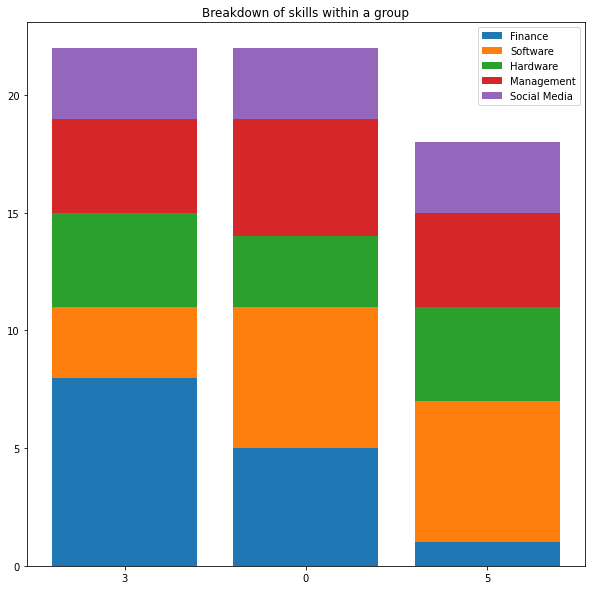

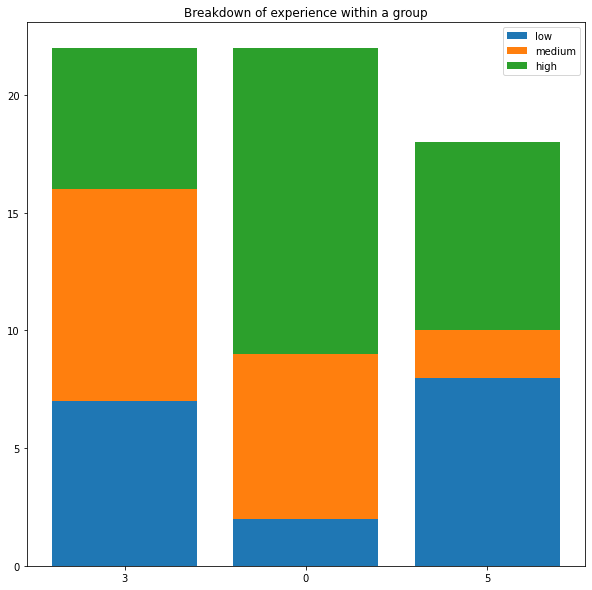

interactive(children=(Dropdown(description='group_idx', options=(3, 0, 5), value=3), Button(description='Run I…

In [ ]:
visulization = Visulization(GrouperApplication, groups_idx, groups_recommended)
visulization.run()